In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')  

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Descriptive Statistics: Mean, Median, Mode

In [5]:
mean_total_bill = np.mean(tips['total_bill'])
median_total_bill = np.median(tips['total_bill'])
mode_total_bill = stats.mode(tips['total_bill'], keepdims=True)[0][0]

print(f"Mean Total Bill: ${mean_total_bill}")
print(f"Median Total Bill: ${median_total_bill}")
print(f"Mode Total Bill: ${mode_total_bill}")

Mean Total Bill: $19.78594262295082
Median Total Bill: $17.795
Mode Total Bill: $13.42


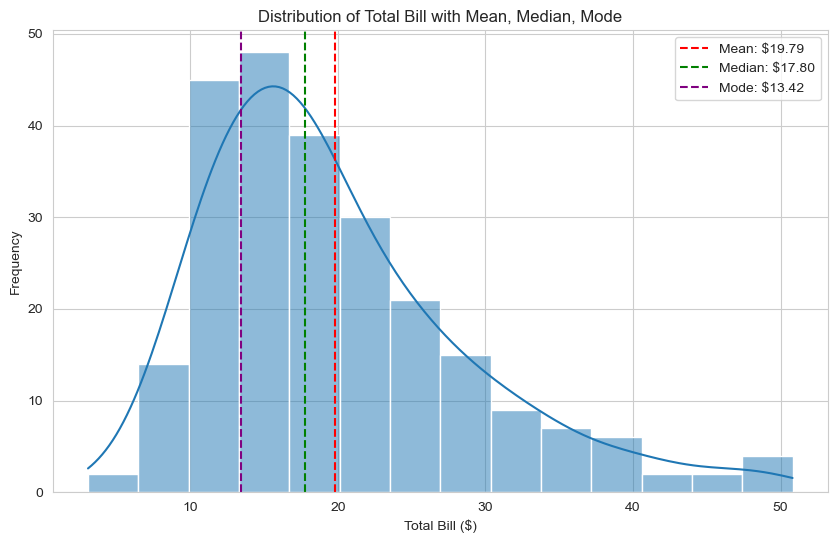

In [6]:
sns.histplot(tips['total_bill'], kde=True) 
plt.axvline(mean_total_bill, color='red', linestyle='--', label=f'Mean: ${mean_total_bill:.2f}')
plt.axvline(median_total_bill, color='green', linestyle='--', label=f'Median: ${median_total_bill:.2f}')
plt.axvline(mode_total_bill, color='purple', linestyle='--', label=f'Mode: ${mode_total_bill:.2f}')
plt.title('Distribution of Total Bill with Mean, Median, Mode')
plt.xlabel('Total Bill ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

kde = kernel density estimator(pdf) pdf = probability density function

# Measures of Dispersion: Variance and Standard Deviation

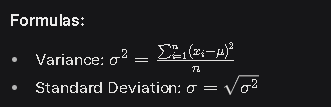

In [7]:
variance_total_bill = np.var(tips['total_bill'])
std_total_bill = np.std(tips['total_bill'])

In [8]:
print(f"Variance of Total Bill: {variance_total_bill}")
print(f"Standard Deviation of Total Bill: ${std_total_bill}")

Variance of Total Bill: 78.92813148851113
Standard Deviation of Total Bill: $8.88415057777113


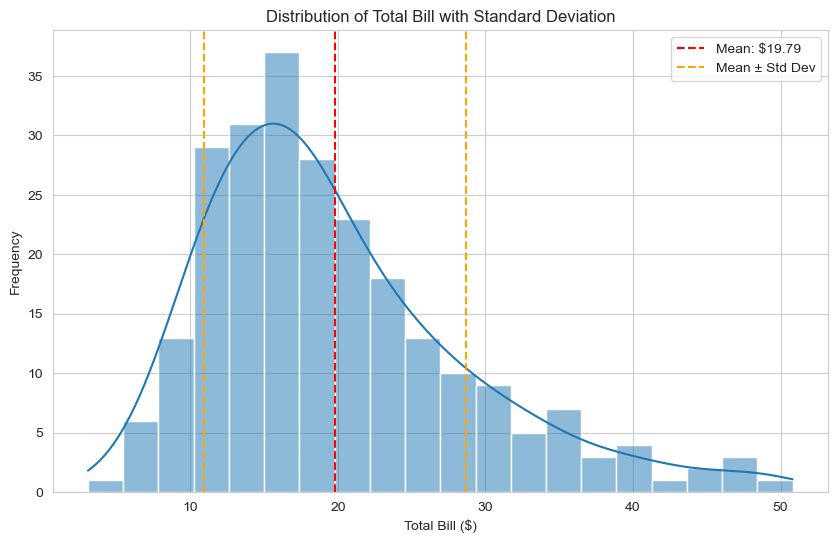

In [9]:
sns.histplot(tips['total_bill'], kde=True, bins=20) # bins = number of bars
plt.axvline(mean_total_bill, color='red', linestyle='--', label=f'Mean: ${mean_total_bill:.2f}')
plt.axvline(mean_total_bill + std_total_bill, color='orange', linestyle='--', label=f'Mean ± Std Dev')
plt.axvline(mean_total_bill - std_total_bill, color='orange', linestyle='--')
plt.title('Distribution of Total Bill with Standard Deviation')
plt.xlabel('Total Bill ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Percentiles and Quartiles

In [10]:
q1_total_bill = np.percentile(tips['total_bill'], 25)
q2_total_bill = np.percentile(tips['total_bill'], 50)  # Median
q3_total_bill = np.percentile(tips['total_bill'], 75)

In [11]:
print(f"Q1 (25th Percentile): ${q1_total_bill}")
print(f"Q2 (50th Percentile/Median): ${q2_total_bill}")
print(f"Q3 (75th Percentile): ${q3_total_bill}")

Q1 (25th Percentile): $13.3475
Q2 (50th Percentile/Median): $17.795
Q3 (75th Percentile): $24.127499999999998


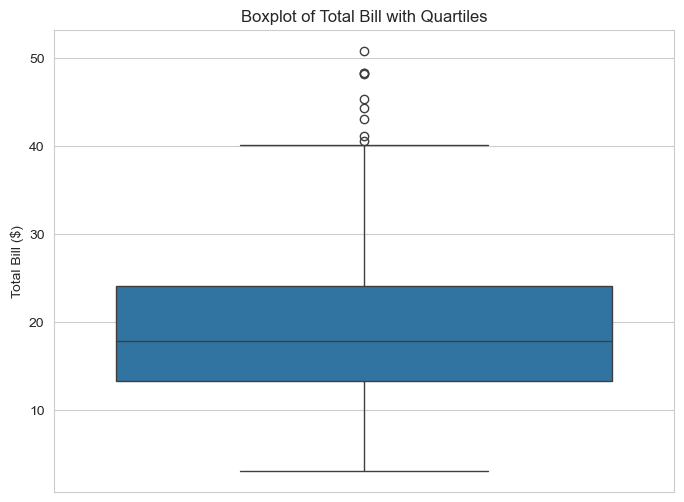

In [128]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=tips['total_bill'])
plt.title('Boxplot of Total Bill with Quartiles')
plt.ylabel('Total Bill ($)')
plt.show()

# Q-Q Plot (Quantile-Quantile Plot)

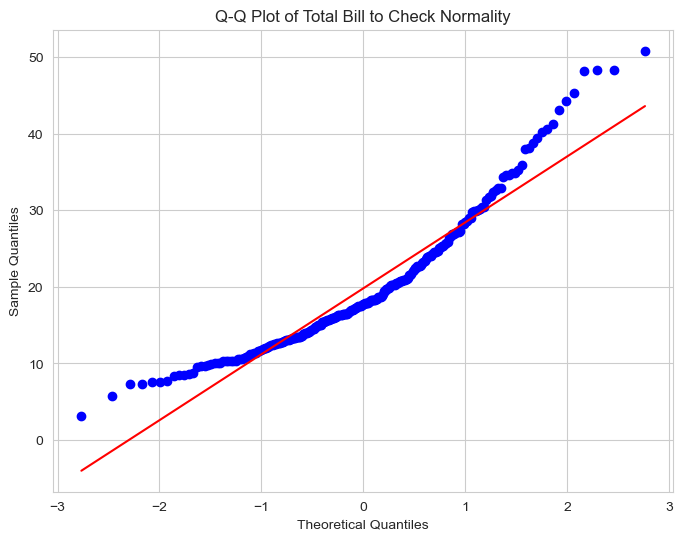

In [14]:
plt.figure(figsize=(8, 6))
stats.probplot(tips['total_bill'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Total Bill to Check Normality')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

**Interpretation: If the points follow the red line closely, the data is approximately normal. Significant deviations suggest non-normality.**

# Outlier Handling And Identifying

In [15]:
# calculating q1, q2 and IQR
q1 = tips['total_bill'].quantile(0.25)
q3 = tips['total_bill'].quantile(0.75)
iqr = q3 - q1

# Defining lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = tips[(tips['total_bill'] < lower_bound) | (tips['total_bill'] > upper_bound)]['total_bill']
print(f"Number of outliers in Total Bill: {len(outliers)}")
print(f"Outliers: {outliers.values}")

Number of outliers in Total Bill: 9
Outliers: [48.27 44.3  41.19 48.17 50.81 45.35 40.55 43.11 48.33]


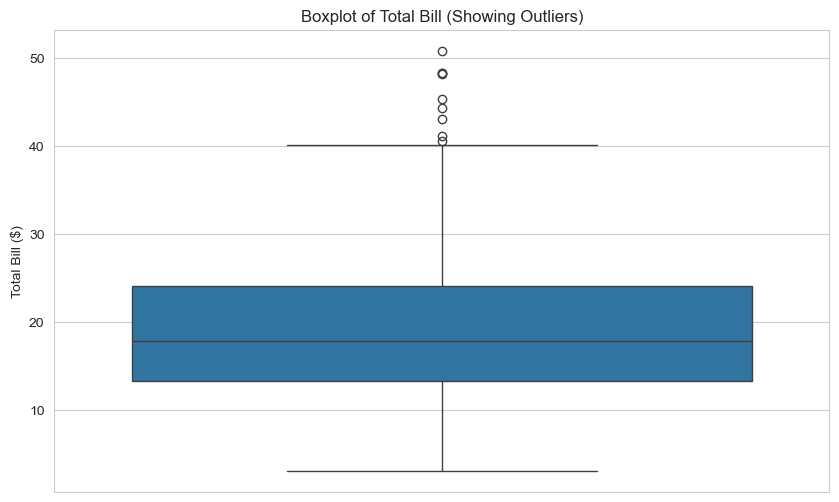

In [21]:
# Boxplot before removing outliers
sns.boxplot(y=tips['total_bill'])
plt.title('Boxplot of Total Bill (Showing Outliers)')
plt.ylabel('Total Bill ($)')
plt.show()

In [18]:
# Handle outliers by capping (winsorizing)
tips_capped = tips.copy()
tips_capped['total_bill'] = tips_capped['total_bill'].clip(lower=lower_bound, upper=upper_bound)

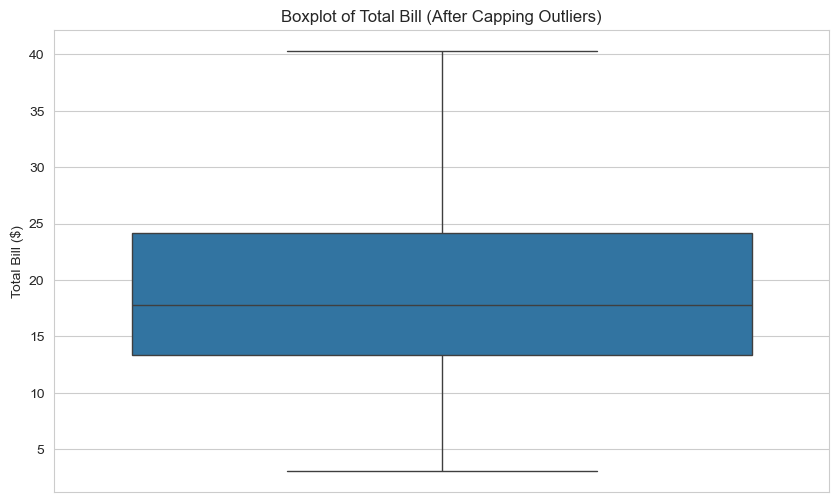

In [22]:
# Boxplot after removing outliers
sns.boxplot(y=tips_capped['total_bill'])
plt.title('Boxplot of Total Bill (After Capping Outliers)')
plt.ylabel('Total Bill ($)')
plt.show()

# Skewness and Kurtosis

In [23]:
# Calculating skewness and kurtosis for 'total_bill'
skewness = stats.skew(tips['total_bill'])
kurtosis = stats.kurtosis(tips['total_bill'])

In [25]:
print(f"Skewness of Total Bill: {skewness}")
print(f"Kurtosis of Total Bill: {kurtosis}")

Skewness of Total Bill: 1.1262346334818638
Kurtosis of Total Bill: 1.1691681323851366


In [26]:
# Interpretation
if skewness > 0:
    print("The distribution is right-skewed (positive skewness).")
elif skewness < 0:
    print("The distribution is left-skewed (negative skewness).")
else:
    print("The distribution is symmetric (zero skewness).")

if kurtosis > 0:
    print("The distribution has heavy tails (leptokurtic).")
elif kurtosis < 0:
    print("The distribution has light tails (platykurtic).")
else:
    print("The distribution has normal tails (mesokurtic).")



The distribution is right-skewed (positive skewness).
The distribution has heavy tails (leptokurtic).


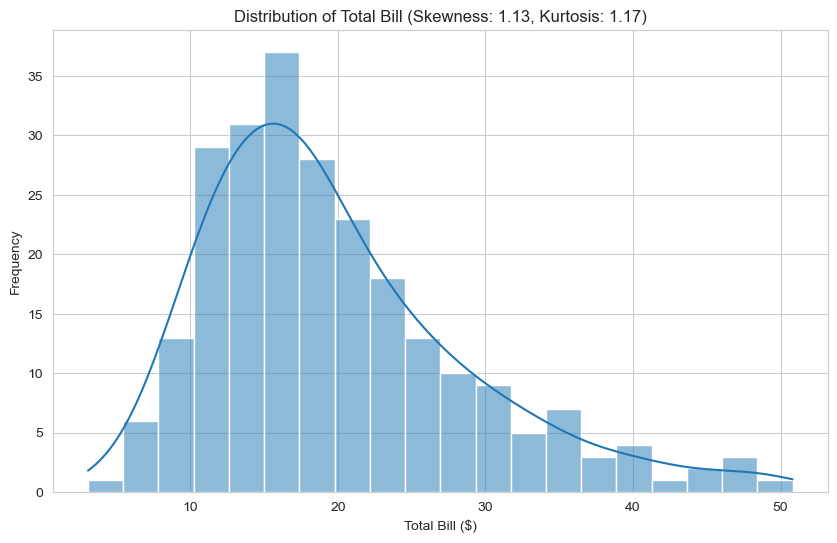

In [28]:
# Visualize the distribution
sns.histplot(tips['total_bill'], kde=True, bins=20)
plt.title(f'Distribution of Total Bill (Skewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f})')
plt.xlabel('Total Bill ($)')
plt.ylabel('Frequency')
plt.show()

# Covariance

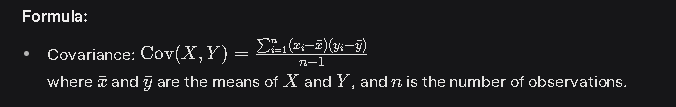

In [29]:
# Calculating covariance between 'total_bill' and 'tip'
covariance = np.cov(tips['total_bill'], tips['tip'])[0][1]

In [30]:
print(f"Covariance between Total Bill and Tip: {covariance:.2f}")

Covariance between Total Bill and Tip: 8.32


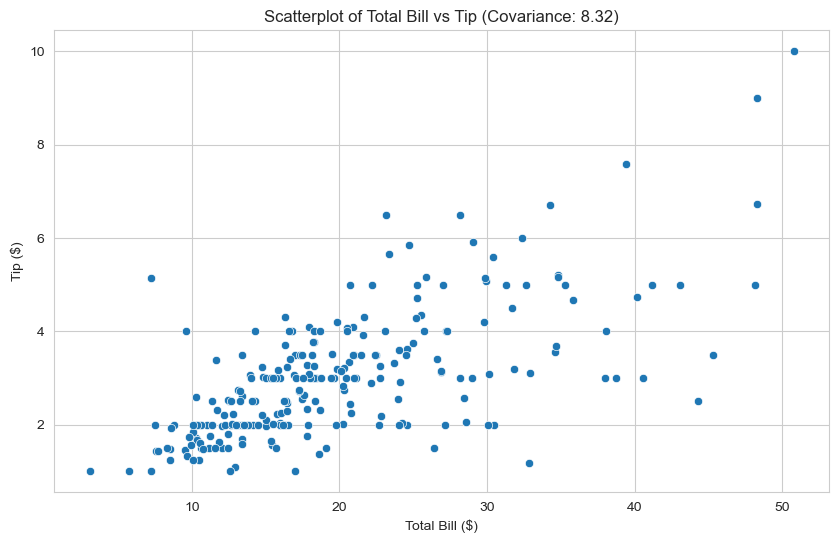

In [32]:
# Visualizing with a scatterplot
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.title(f'Scatterplot of Total Bill vs Tip (Covariance: {covariance:.2f})')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.show()

# Correlation Analysis

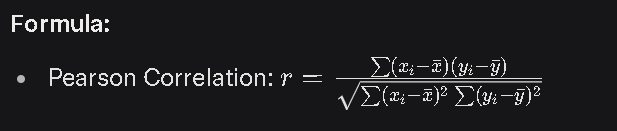

In [54]:
numeric_df = tips.select_dtypes(include='number')
corr = numeric_df.corr()
corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


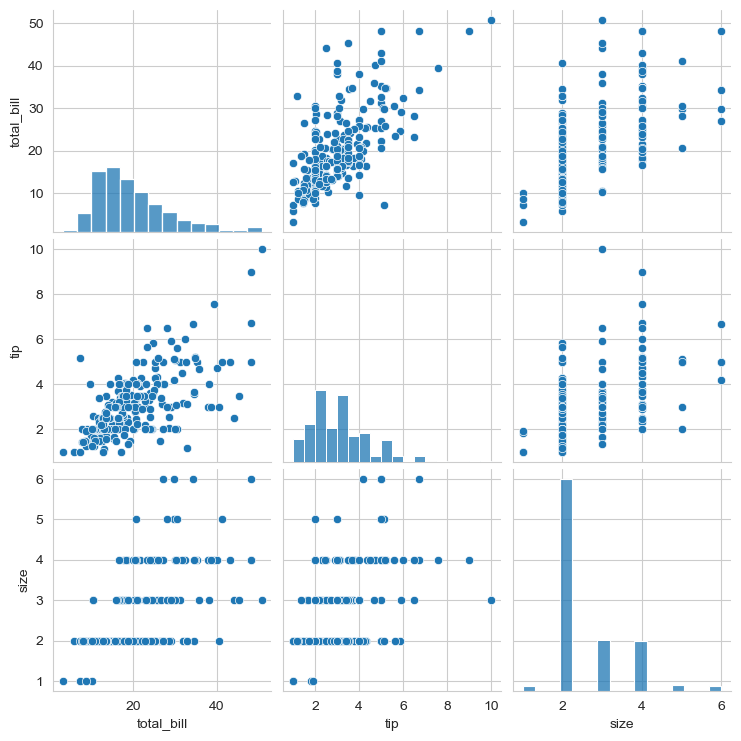

In [115]:
sns.pairplot(numeric_df)

# Z-Test (One-Sample Z-Test)
### Explanation:

A Z-test compares a sample mean to a population mean to determine if they are significantly different, assuming the population standard deviation is known. It’s often used for large samples (n > 30).

- Null Hypothesis (H0): The sample mean equals the population mean.
- Alternative Hypothesis (H1): The sample mean is different from the population mean.


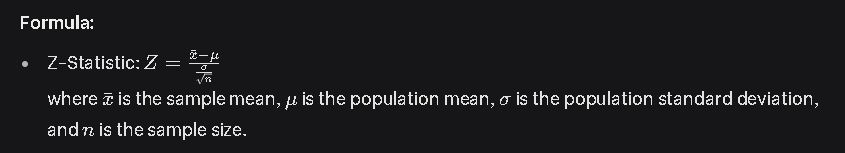

We’ll perform a one-sample Z-test on the "total_bill" column, assuming a population mean of $20 and a known population standard deviation.

In [55]:
from statsmodels.stats.weightstats import ztest

# Assume population mean and standard deviation for 'total_bill'
population_mean = 20
population_std = 9  # Assumed value

# Perform one-sample Z-test
z_stat, p_value = ztest(tips['total_bill'], value=population_mean, alternative='two-sided')

In [56]:
# Print results
print(f"Z-Statistic: {z_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: The sample mean is significantly different from $20.")
else:
    print("Fail to reject the null hypothesis: No significant difference from $20.")

Z-Statistic: -0.38
P-Value: 0.7072
Fail to reject the null hypothesis: No significant difference from $20.


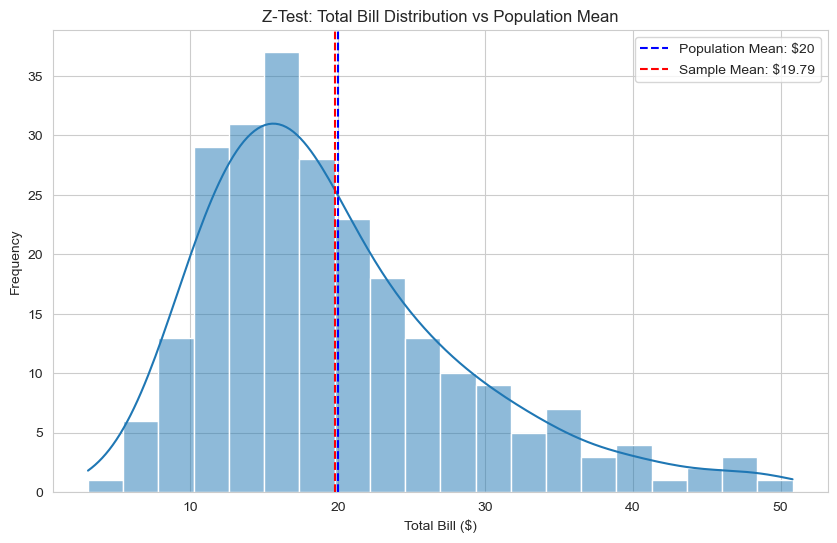

In [57]:
# Visualize the sample distribution
sns.histplot(tips['total_bill'], kde=True, bins=20)
plt.axvline(population_mean, color='blue', linestyle='--', label=f'Population Mean: ${population_mean}')
plt.axvline(mean_total_bill, color='red', linestyle='--', label=f'Sample Mean: ${mean_total_bill:.2f}')
plt.title('Z-Test: Total Bill Distribution vs Population Mean')
plt.xlabel('Total Bill ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# T-Test (One-Sample T-Test)

# Explanation:

A T-test is similar to a Z-test but is used when the population standard deviation is unknown or the sample size is small (n < 30). It compares the sample mean to a hypothesized population mean.

- Null Hypothesis (H0): The sample mean equals the hypothesized mean.
- Alternative Hypothesis (H1): The sample mean is different from the hypothesized mean.

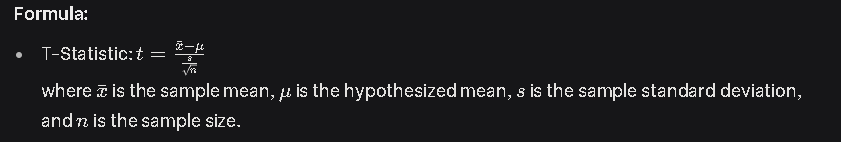

We’ll perform a one-sample T-test on the "total_bill" column, testing if the mean is significantly different from $20.

In [61]:
# Perform one-sample T-test
t_stat, p_value = stats.ttest_1samp(tips['total_bill'], popmean=20)

In [62]:
# Print results
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: The sample mean is significantly different from $20.")
else:
    print("Fail to reject the null hypothesis: No significant difference from $20.")


T-Statistic: -0.38
P-Value: 0.7075
Fail to reject the null hypothesis: No significant difference from $20.


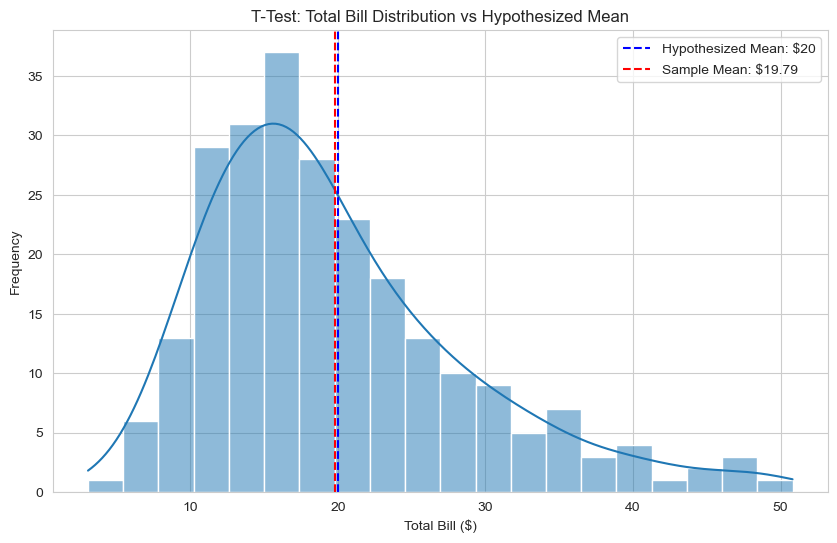

In [63]:
sns.histplot(tips['total_bill'], kde=True, bins=20)
plt.axvline(20, color='blue', linestyle='--', label='Hypothesized Mean: $20')
plt.axvline(mean_total_bill, color='red', linestyle='--', label=f'Sample Mean: ${mean_total_bill:.2f}')
plt.title('T-Test: Total Bill Distribution vs Hypothesized Mean')
plt.xlabel('Total Bill ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Chi-Square Test (Test of Independence)

# Explanation:

A Chi-Square test determines if there’s a significant association between two categorical variables.

- Null Hypothesis (H0): The variables are independent (no association).
- Alternative Hypothesis (H1): The variables are not independent (there’s an association).

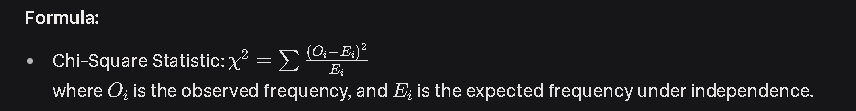

We’ll test if there’s an association between "sex" and "day" in the tips dataset using a contingency table and visualize the relationship with a heatmap.

In [65]:
# Creating a contingency table for 'sex' and 'day'
contingency_table = pd.crosstab(tips['sex'], tips['day'])

In [66]:
# Performing Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

In [69]:
# results
print("Contingency Table:")
print(contingency_table)
print(f"\nChi-Square Statistic: {chi2_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")

Contingency Table:
day     Thur  Fri  Sat  Sun
sex                        
Male      30   10   59   58
Female    32    9   28   18

Chi-Square Statistic: 13.22
P-Value: 0.0042
Degrees of Freedom: 3


In [70]:
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant association between sex and day.")
else:
    print("Fail to reject the null hypothesis: No significant association between sex and day.")

Reject the null hypothesis: There is a significant association between sex and day.


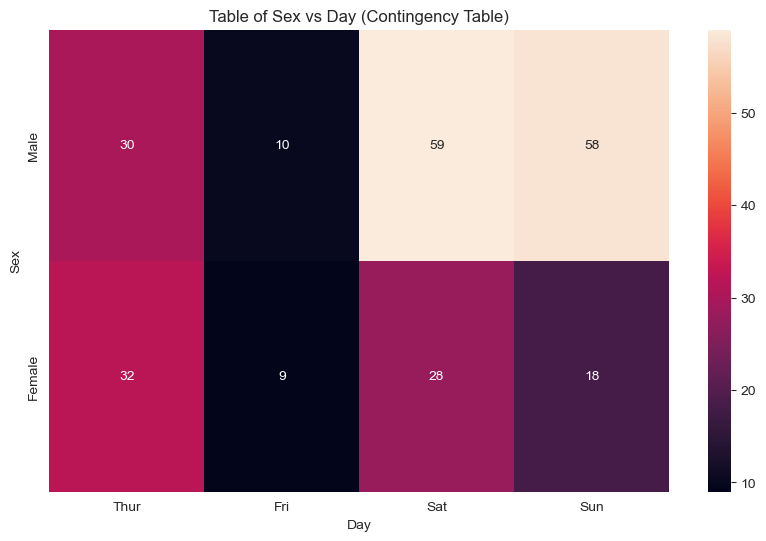

In [79]:
# Visualize the contingency table with a heatmap
sns.heatmap(contingency_table, annot=True)
plt.title('Table of Sex vs Day (Contingency Table)')
plt.xlabel('Day')
plt.ylabel('Sex')
plt.show()

## T Test

A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features

T-test has 2 types : 1. one sampled t-test 2. two-sampled t-test.

##  One-sample T-test with Python

The test will tell us whether means of the sample and the population are different

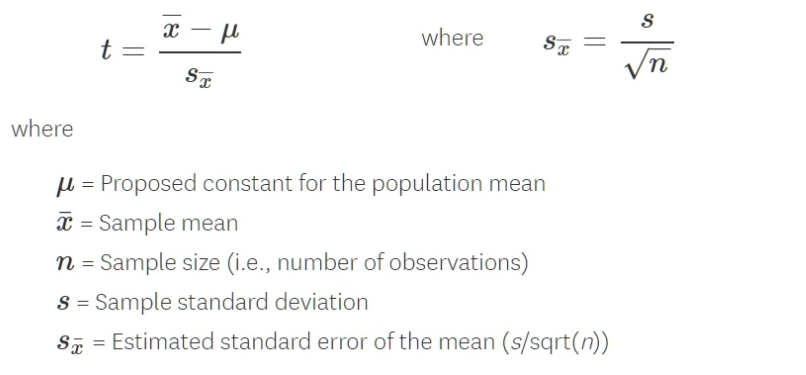

In [80]:
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]

In [81]:
len(ages)

32

In [82]:
ages_mean=np.mean(ages)
print(ages_mean)

30.34375


In [83]:
## Lets take sample

sample_size=10
age_sample=np.random.choice(ages,sample_size)

In [84]:
age_sample

array([70, 32, 55, 17, 35, 19, 19, 35, 23, 43])

In [85]:
from scipy.stats import ttest_1samp

In [86]:
ttest,p_value=ttest_1samp(age_sample,30)

In [87]:
print(p_value)

0.4017384407426935


In [88]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


## Some More Examples
Consider the age of students in a college and in Class A

In [89]:
np.random.seed(6)
school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500)
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)

In [90]:
classA_ages.mean()

46.9

In [91]:
_,p_value=stats.ttest_1samp(a=classA_ages,popmean=school_ages.mean())

In [92]:
p_value

1.139027071016194e-13

In [93]:
school_ages.mean()

53.303333333333335

In [94]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


## Two-sample T-test With Python
The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test

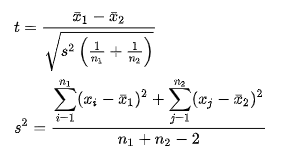

In [99]:
np.random.seed(12)
ClassB_ages=stats.poisson.rvs(loc=18,mu=33,size=60)
ClassB_ages.mean()

50.63333333333333

In [101]:
_, p_value = stats.ttest_ind(a=classA_ages, b=ClassB_ages, equal_var=False)

In [102]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


## Paired T-test With Python
When you want to check how different samples from the same group are, you can go for a paired T-test

In [103]:
weight1=[25,30,28,35,28,34,26,29,30,26,28,32,31,30,45]
weight2=weight1+stats.norm.rvs(scale=5,loc=-1.25,size=15)

In [104]:
print(weight1)
print(weight2)

[25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45]
[30.57926457 34.91022437 29.00444617 30.54295091 19.86201983 37.57873174
 18.3299827  21.3771395  36.36420881 32.05941216 26.93827982 29.519014
 26.42851213 30.50667769 41.32984284]


In [105]:
weight_df=pd.DataFrame({"weight_10":np.array(weight1),
                         "weight_20":np.array(weight2),
                       "weight_change":np.array(weight2)-np.array(weight1)})

In [106]:
weight_df

,weight_10,weight_20,weight_change
0,25,30.579265,5.579265
1,30,34.910224,4.910224
2,28,29.004446,1.004446
3,35,30.542951,-4.457049
4,28,19.862020,-8.137980
5,34,37.578732,3.578732
6,26,18.329983,-7.670017
7,29,21.377139,-7.622861
8,30,36.364209,6.364209
9,26,32.059412,6.059412


In [107]:
_,p_value=stats.ttest_rel(a=weight1,b=weight2)

In [108]:
print(p_value)

0.5732936534411279


In [109]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


## Anova Test(F-Test)
The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time.


For example, if we wanted to test whether petal_width age differs based on some categorical variable like species, we have to compare the means of each level or group the variable

### One Way F-test(Anova) :-
It tell whether two or more groups are similar or not based on their mean similarity and f-score.

Example : there are 3 different category of iris flowers and their petal width and need to check whether all 3 group are similar or not 


In [117]:
df=sns.load_dataset('iris')

In [118]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [119]:
df_anova = df1[['petal_width','species']]

In [120]:
grps = pd.unique(df_anova.species.values)

In [122]:
grps

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [123]:
d_data = {grp:df_anova['petal_width'][df_anova.species == grp] for grp in grps}

In [124]:
d_data

{'setosa': 0     0.2
 1     0.2
 2     0.2
 3     0.2
 4     0.2
 5     0.4
 6     0.3
 7     0.2
 8     0.2
 9     0.1
 10    0.2
 11    0.2
 12    0.1
 13    0.1
 14    0.2
 15    0.4
 16    0.4
 17    0.3
 18    0.3
 19    0.3
 20    0.2
 21    0.4
 22    0.2
 23    0.5
 24    0.2
 25    0.2
 26    0.4
 27    0.2
 28    0.2
 29    0.2
 30    0.2
 31    0.4
 32    0.1
 33    0.2
 34    0.2
 35    0.2
 36    0.2
 37    0.1
 38    0.2
 39    0.2
 40    0.3
 41    0.3
 42    0.2
 43    0.6
 44    0.4
 45    0.3
 46    0.2
 47    0.2
 48    0.2
 49    0.2
 Name: petal_width, dtype: float64,
 'versicolor': 50    1.4
 51    1.5
 52    1.5
 53    1.3
 54    1.5
 55    1.3
 56    1.6
 57    1.0
 58    1.3
 59    1.4
 60    1.0
 61    1.5
 62    1.0
 63    1.4
 64    1.3
 65    1.4
 66    1.5
 67    1.0
 68    1.5
 69    1.1
 70    1.8
 71    1.3
 72    1.5
 73    1.2
 74    1.3
 75    1.4
 76    1.4
 77    1.7
 78    1.5
 79    1.0
 80    1.1
 81    1.0
 82    1.2
 83    1.6
 84    1.5
 85  

In [125]:
F, p = stats.f_oneway(d_data['setosa'], d_data['versicolor'], d_data['virginica'])

In [126]:
print(p)

4.169445839443116e-85


In [127]:
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis
